In [1]:
# Esenciales
import pandas as pd                                            # Procesar datos
import seaborn as sns                                          # Mapa de calor
import matplotlib.pyplot as plt                                # Gráficas
import missingno as msno                                       # Gráficas

# 1. Preprocesamiento de datos
from sklearn.pipeline import Pipeline                          # (1) Pipeline para preprocesar los datos
from imblearn.over_sampling import SMOTE                       # (1) Balanceo SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler # (1) Normalización y estandarización de datos
from sklearn.impute import KNNImputer                          # (1) Manejo de valores nulos
from collections import Counter                                # (1) Librería para contar datos

# 2. Análisis de importanica de características
from sklearn.ensemble import RandomForestClassifier            # (2) Random Forest para análisis de importancia

# 3. Red neuronal multicapa (MLP)
from sklearn.neural_network import MLPClassifier               # (3) Red Neuronal Multicapa (MLP)
from sklearn.model_selection import GridSearchCV               # (3) Elegir la mejor combinación de hiperparámetros

# 4. Datos de entrenamiento/prueba del modelo
from sklearn.model_selection import train_test_split           # (4) Entrenamiento/test de datos

# 5. Cálculo de métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score

In [2]:
# ==========================================================================
# INFO: Mostrar datos y metadatos del dataset
# ==========================================================================

df = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')

# Dimensiones
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 3276, Columnas: 10


In [3]:
# ==========================================================================
# INFO: Información técnica del dataset (se describe mejor con las gráficas)
# ==========================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


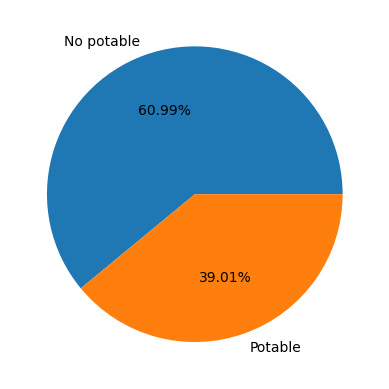

In [4]:
# ==========================================================================
# INFO: Visualizar proporcionar potable/no potable de los datos del dataset
# ==========================================================================

# Tamaño total de la muestra
tamaño_muestra = df["Potability"].count()

# Total de valores no potables (Potability = 0)
num_no_potable = df["Potability"].value_counts()[0]

# Total de valores no potables (Potability = 1)
num_potable = df["Potability"].value_counts()[1]

fig, ax = plt.subplots()
plt.pie([num_no_potable, num_potable], labels=["No potable", "Potable"], autopct='%.2f%%')
plt.show()

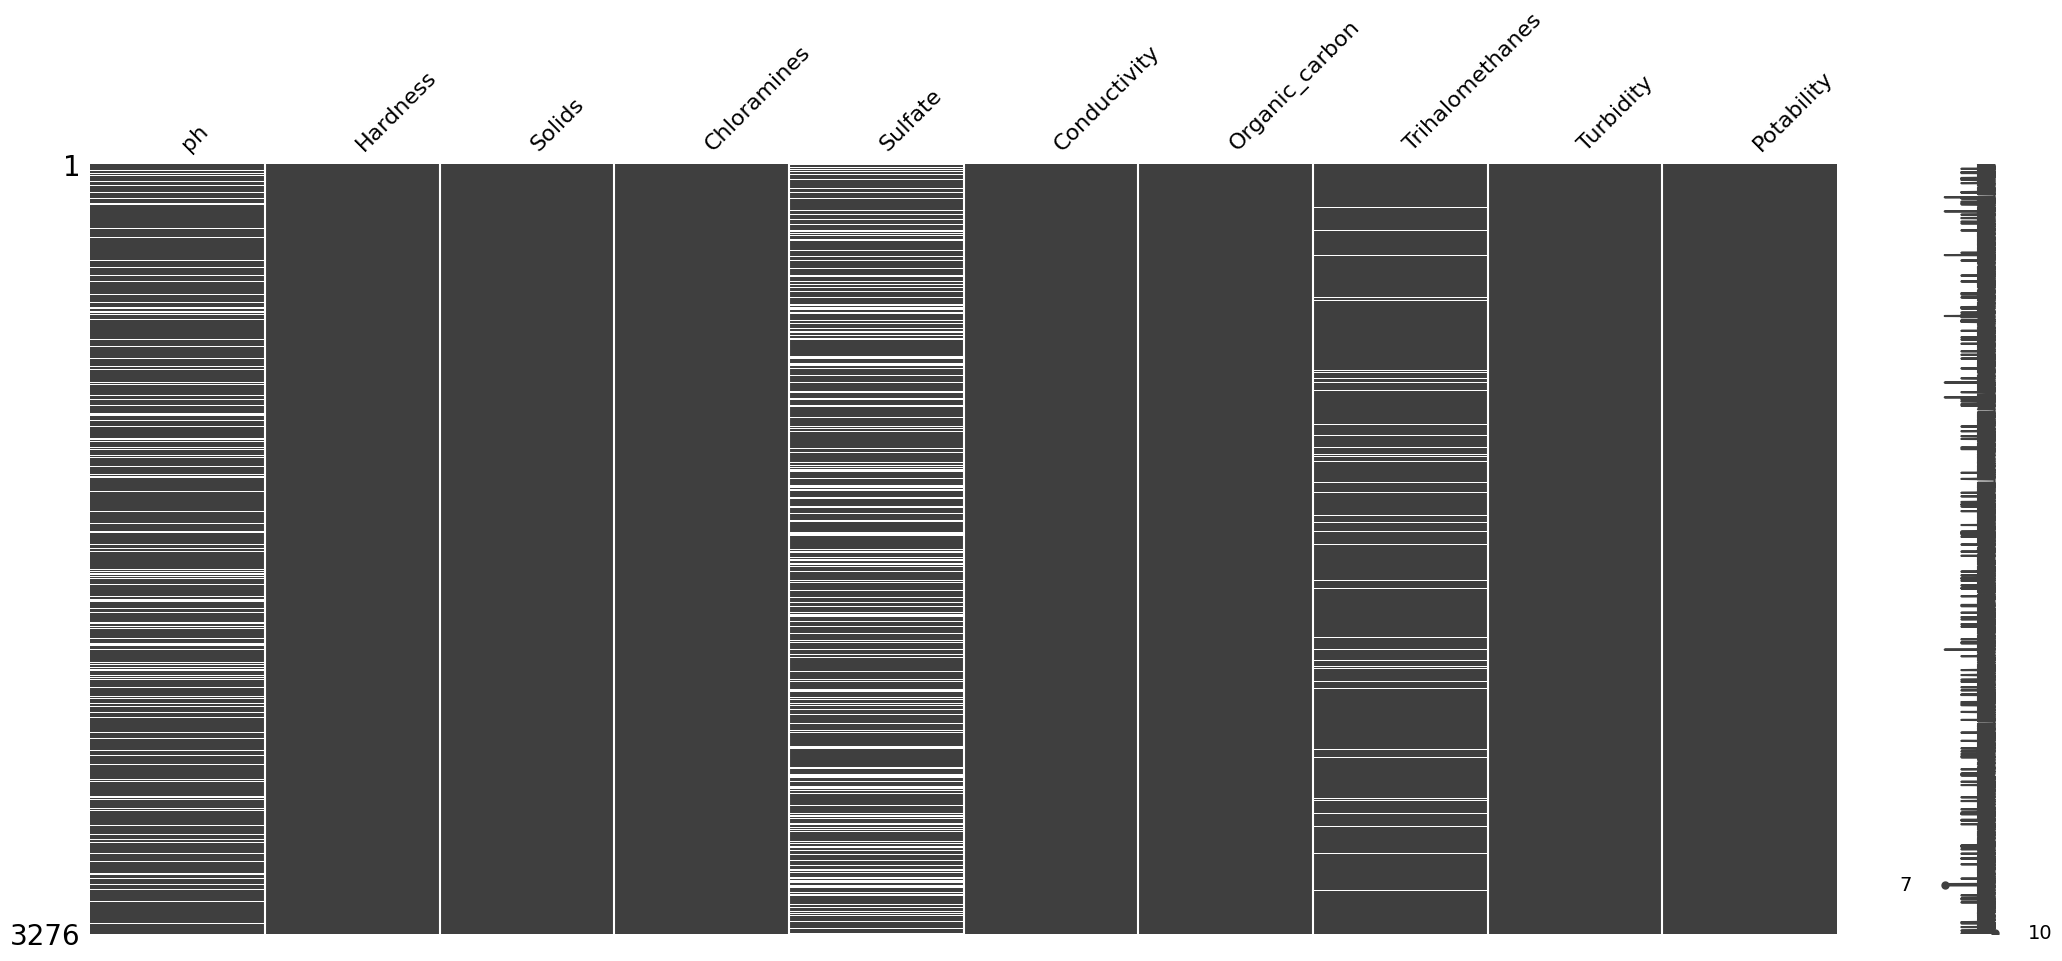

In [5]:
# ==========================================================================
# INFO: Visualizar datos faltantes del dataset. Las líneas blancas son las 
#       celdas donde escazan los valores
# ==========================================================================

msno.matrix(df)
plt.show()

In [6]:
# ==========================================================================
# INFO: Estadísticas de las columnas
# ==========================================================================

# Las columnas representan las variables del dataset
# Las filas representan las estadísticas de cada variable:
#    - mean (promedio)
#    - std (dispersión)
#    - min (mínimo valor)
#    - 25% 50% 75% (percentiles)
#    - max (máximo valor)

df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


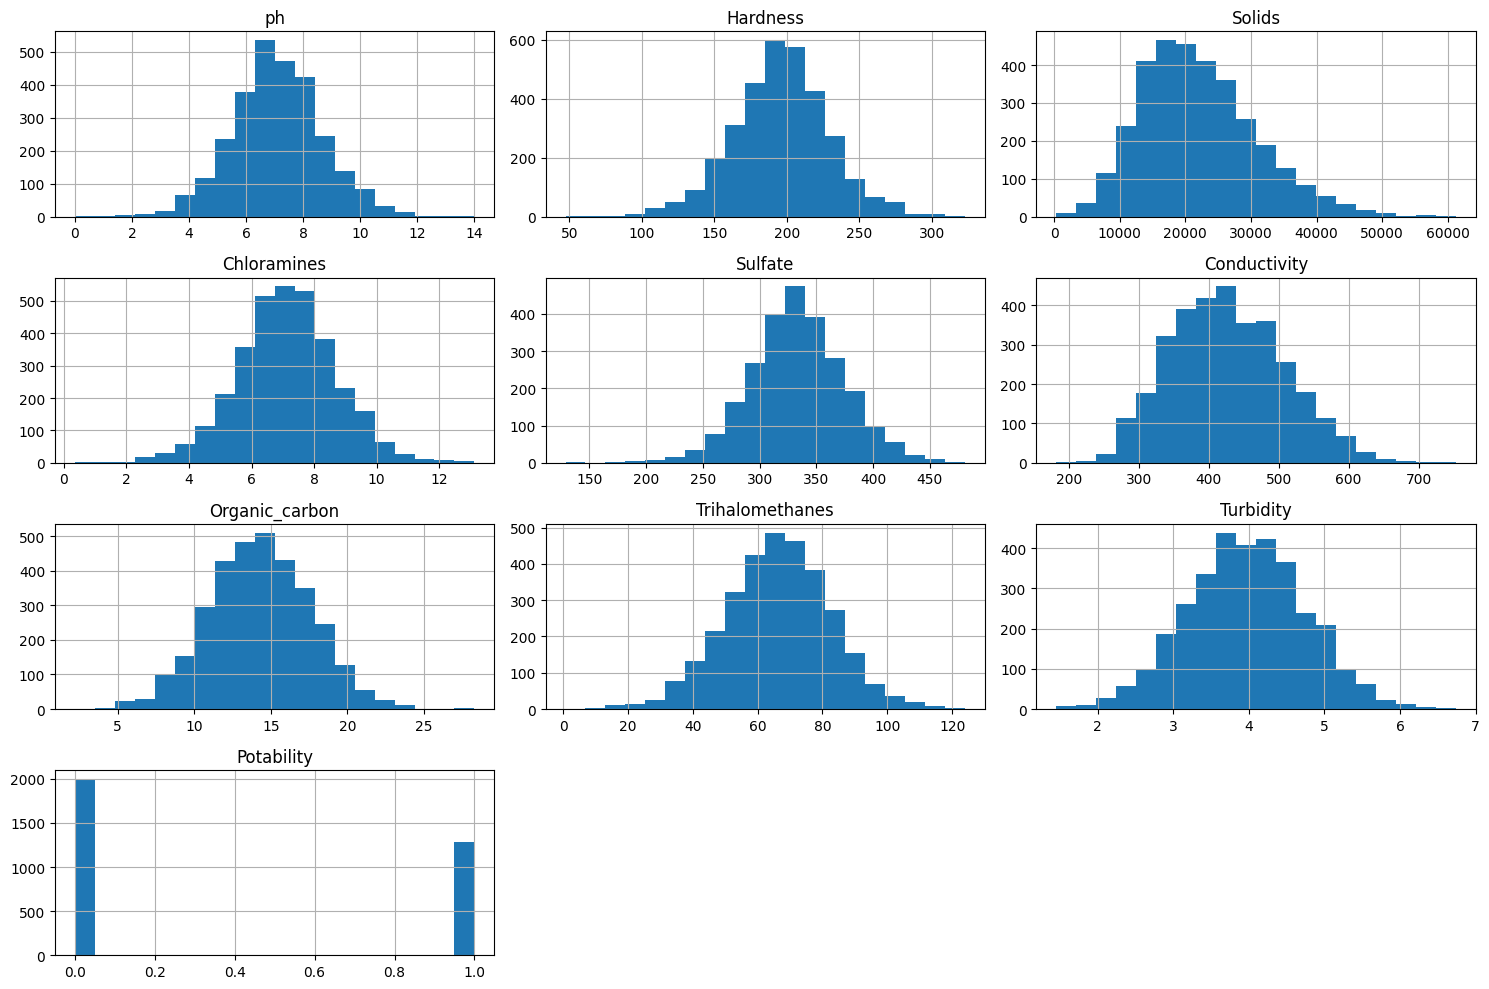

In [7]:
# ==========================================================================
# INFO: Historigramas para ver la distribución de los valores del dataset
# ==========================================================================

df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [8]:
# ==========================================================================
# 1. Preprocesamiento de datos: DIVIDIR VALORES X, y
# ==========================================================================

X = df.drop("Potability", axis=1)
columnas = X.columns
indice = X.index

y = df["Potability"]

In [9]:
# ==========================================================================
# 1. Preprocesamiento de datos: MANEJO DE VALORES NULOS
# ==========================================================================

# Más pequeño = más sensible al ruido | Más grande = Tiende a suavizar demasiado los datos
imputer = KNNImputer(n_neighbors=30)

# Utilizar el KNNImputer en el X. En el "y" no se utiliza porque no hay ninguna celda nula
X_imputed = imputer.fit_transform(X)

# Convertir Numpy a Pandas
X = pd.DataFrame(X_imputed, columns=columnas, index=indice)

# Imprimir estadísticas de las variables
X.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080778,196.369496,22014.092526,7.122277,333.737933,426.205111,14.284970,66.404363,3.966786
std,1.476093,32.879761,8768.570828,1.583085,36.501087,80.824064,3.308162,15.784288,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.277197,176.850538,15666.690297,6.127421,315.968460,365.734414,12.065801,56.629028,3.439711
50%,7.042513,196.967627,20927.833607,7.130299,333.484772,421.884968,14.218338,66.617005,3.955028
75%,7.882803,216.667456,27332.762127,8.114887,351.073966,481.792304,16.557652,76.666609,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


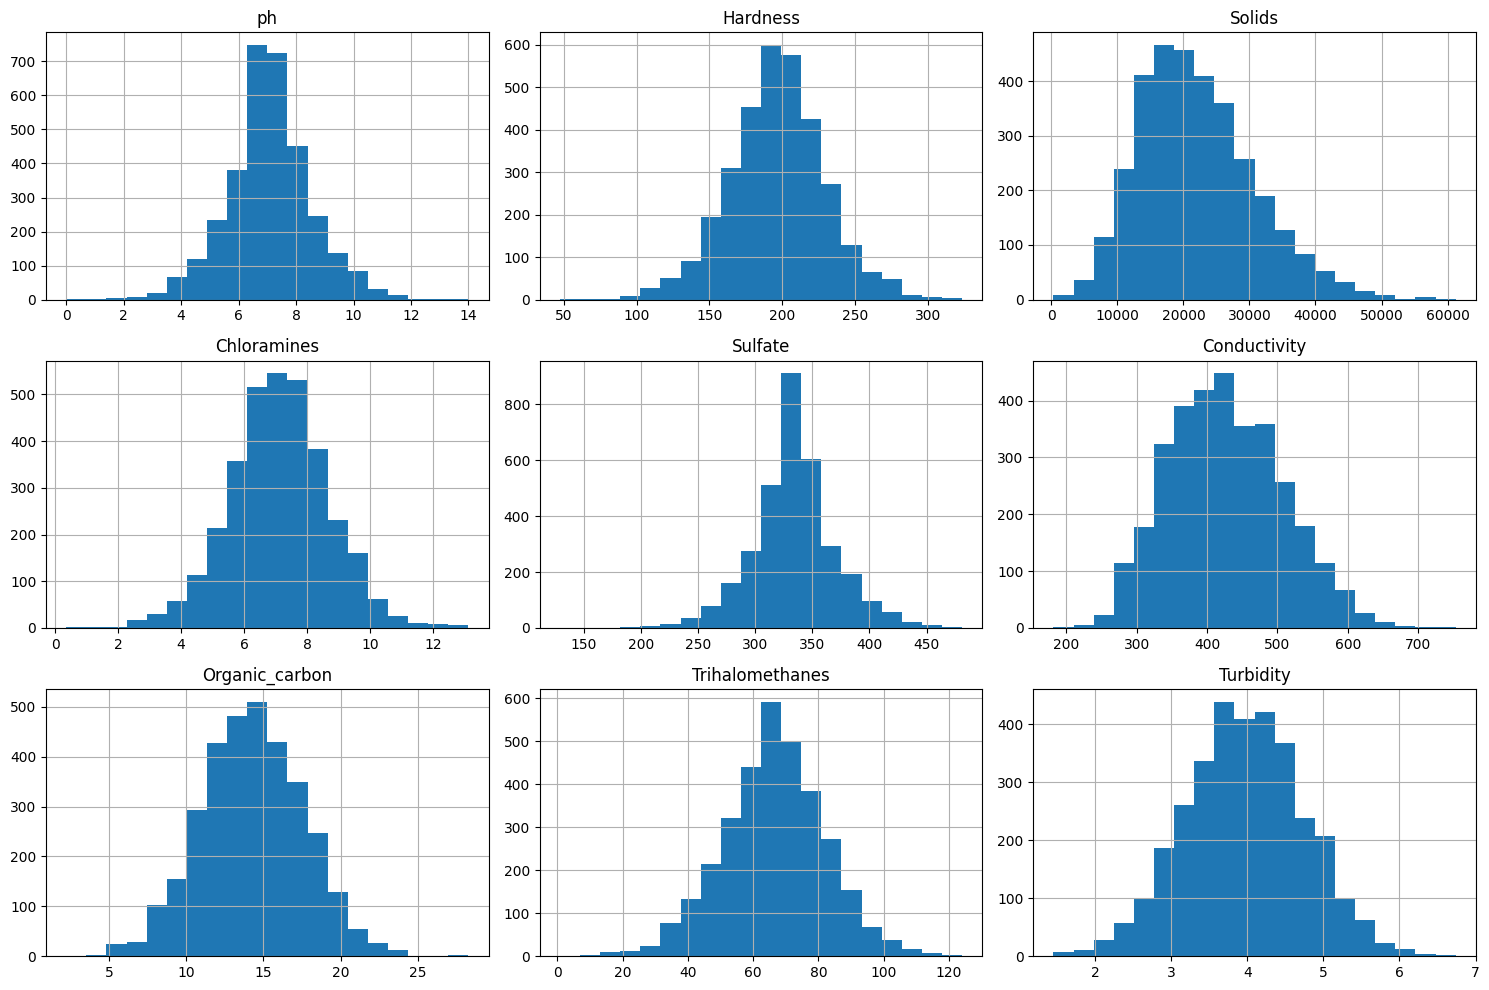

In [10]:
# ==========================================================================
# INFO: Historigramas para ver la distribución de los valores del dataset 
#       después de manejar los valores nulos
# ==========================================================================

X.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [11]:
# ==========================================================================
# 1. Preprocesamiento de datos: NORMALIZACIÓN DE DATOS
# ==========================================================================

# Seleccionamos los valores a normalizar
features = ['ph','Hardness','Solids','Chloramines','Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Instanciamos el normalizador
scaler = MinMaxScaler()

# Creamos una copia de los valores X
X = X.copy()

# Realizamos la normalización
X[features] = scaler.fit_transform(X[features])

# Imprimimos estadísticas
X.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.505770,0.540231,0.356173,0.529963,0.581591,0.427940,0.463026,0.532738,0.475853
std,0.105435,0.119263,0.143968,0.123921,0.103687,0.141336,0.126750,0.128055,0.147548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448371,0.469432,0.251957,0.452088,0.531114,0.322196,0.378000,0.453433,0.376198
50%,0.503037,0.542401,0.338338,0.530591,0.580872,0.420386,0.460473,0.534463,0.473630
75%,0.563057,0.613857,0.443498,0.607662,0.630837,0.525145,0.550102,0.615994,0.576729
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


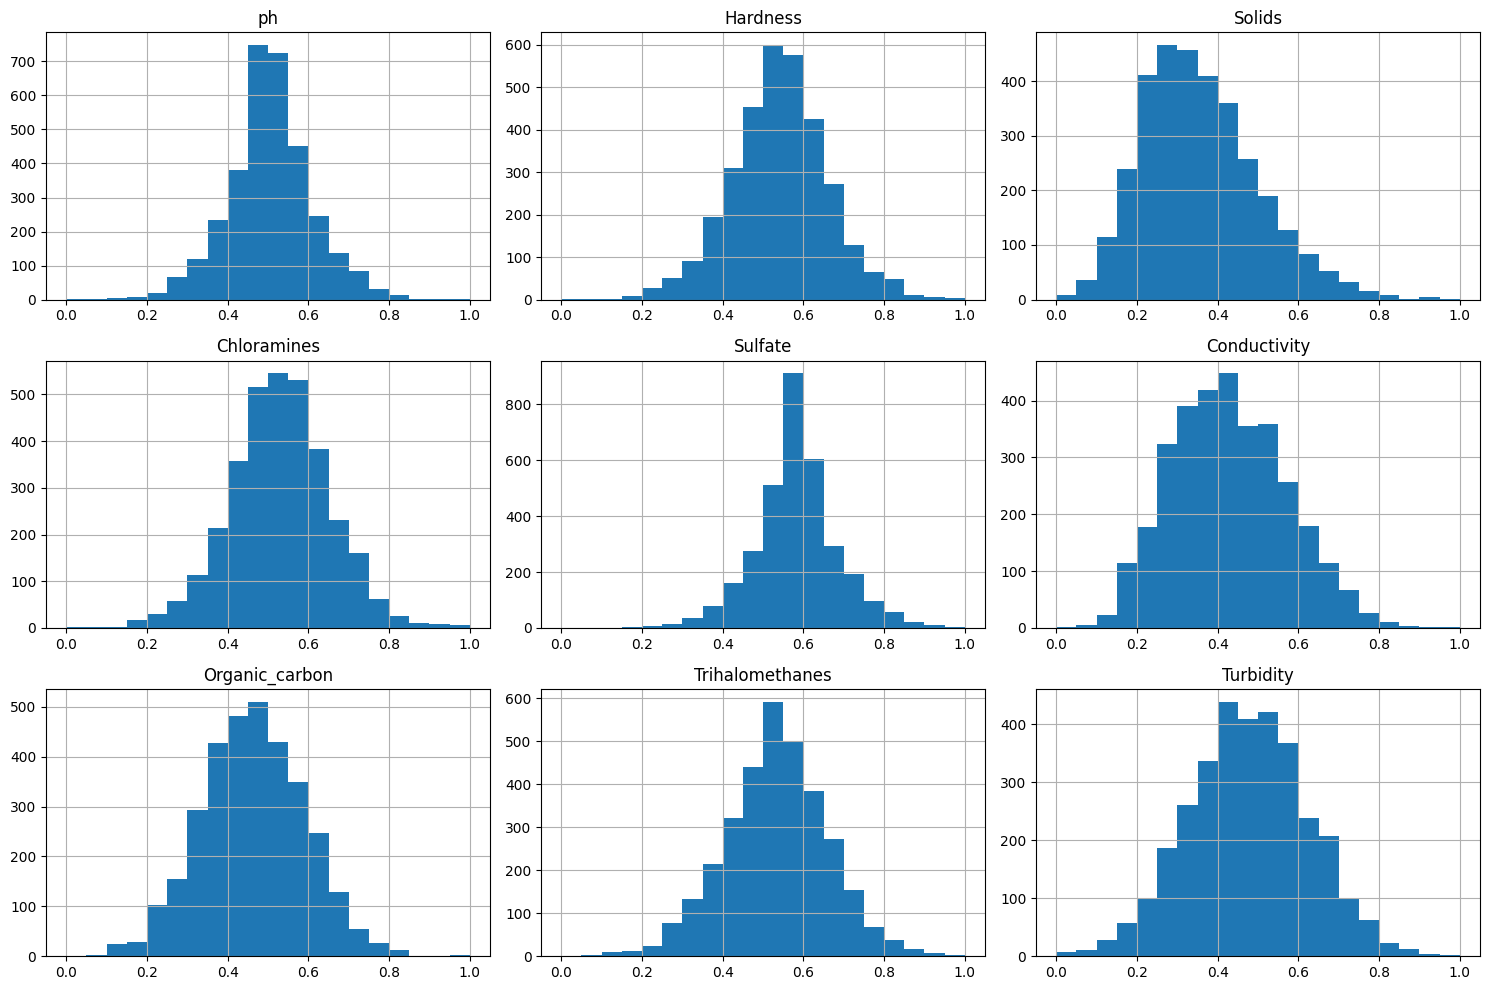

In [12]:
# ==========================================================================
# INFO: Historigramas para ver la distribución de los valores del dataset 
#       después de normalizar los datos
# ==========================================================================

X.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [13]:
# ==========================================================================
# 1. Preprocesamiento de datos: DIVISIÓN DE DATOS DE ENTRENAMIENTO/TEST
# ==========================================================================

# Tamaño de datos de prueba (porcentajes)
test_size= 0.30

# Semilla para el generador aleatorio
random_state = 42

# Recordar que X es el conjunto SIN DIVIDIR de los datos; "y" es el conjunto SIN DIVIDIR de los resultados
# Dividir en datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state, stratify=y)

print(f"Conjunto de datos de prueba en su totalidad: {len(X_train) + len(y_test)} filas")
print(f"Se ha dividido correctamente el {100-test_size*100}% para datos de ENTRENAMIENTO y {test_size*100}% para PRUEBA")

Conjunto de datos de prueba en su totalidad: 3276 filas
Se ha dividido correctamente el 70.0% para datos de ENTRENAMIENTO y 30.0% para PRUEBA


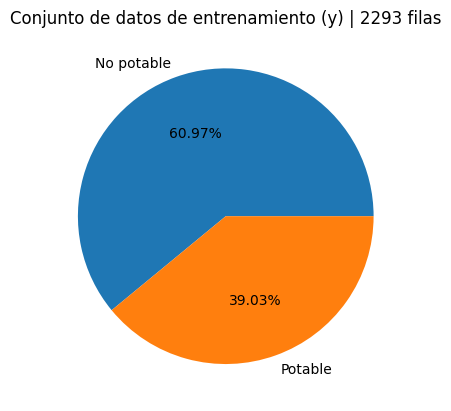

In [14]:
# ==========================================================================
# INFO: Visualizar proporcionar de datos X_train/y_train
# ==========================================================================

# Tamaño total de la muestra
y_train_tamaño_muestra = y_train.count()

# Total de valores no potables (Potability = 0)
y_train_num_no_potable = y_train.value_counts()[0]

# Total de valores no potables (Potability = 1)
y_train_num_potable = y_train.value_counts()[1]

fig, ax = plt.subplots()
plt.pie([y_train_num_no_potable, y_train_num_potable], labels=["No potable", "Potable"], autopct='%.2f%%')
plt.title(f"Conjunto de datos de entrenamiento (y) | {y_train_tamaño_muestra} filas")
plt.show()

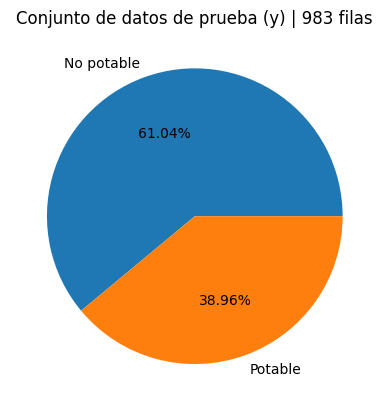

In [15]:
# ==========================================================================
# INFO: Visualizar proporcionar de datos X_test/y_test
# ==========================================================================

# Tamaño total de la muestra
y_test_tamaño_muestra = y_test.count()

# Total de valores no potables (Potability = 0)
y_test_num_no_potable = y_test.value_counts()[0]

# Total de valores no potables (Potability = 1)
y_test_num_potable = y_test.value_counts()[1]

fig, ax = plt.subplots()
plt.pie([y_test_num_no_potable, y_test_num_potable], labels=["No potable", "Potable"], autopct='%.2f%%')
plt.title(f"Conjunto de datos de prueba (y) | {y_test_tamaño_muestra} filas")
plt.show()

In [16]:
# ==========================================================================
# 1. Preprocesamiento de datos: FUNCIÓN SMOTE
# ==========================================================================

# Antes de ejecutar SMOTE
print(f"Antes de ejecutar la función SMOTE {Counter(y_train)}")

# Agrega datos sintéticos en proporción
sampling_strategy = 0.75

# Semilla para el generador aleatorio
random_state = 42

# Número de vecinos cercanos para crear el dato sintético
k_neighbors = 10

# Instanciar SMOTE: Balancear datasets desequilibrados creando datos SINTÉTICOS en la muestra que tiene menos datos
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state, k_neighbors=k_neighbors)

# Reemplazo de X_train, y_train
X_train, y_train = smote.fit_resample(X_train, y_train)

# Después de ejecutar SMOTE
print("Después de ejecutar SMOTE:", Counter(y_train),'\n\n')

Antes de ejecutar la función SMOTE Counter({0: 1398, 1: 895})
Después de ejecutar SMOTE: Counter({0: 1398, 1: 1048}) 




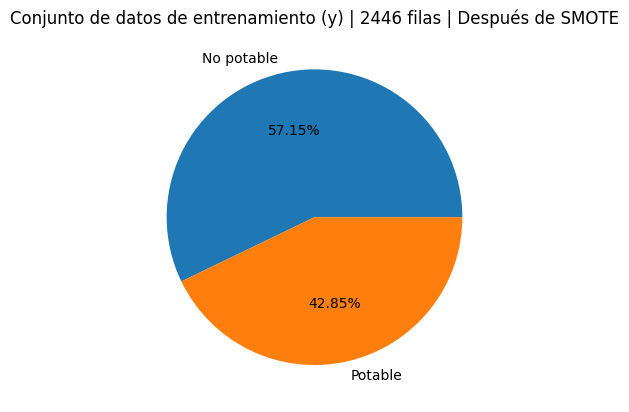

In [17]:
# ==========================================================================
# INFO: Visualizar proporcionar de datos X_train/y_train
# ==========================================================================

# Tamaño total de la muestra
y_train_tamaño_muestra = y_train.count()

# Total de valores no potables (Potability = 0)
y_train_num_no_potable = y_train.value_counts()[0]

# Total de valores no potables (Potability = 1)
y_train_num_potable = y_train.value_counts()[1]

fig, ax = plt.subplots()
plt.pie([y_train_num_no_potable, y_train_num_potable], labels=["No potable", "Potable"], autopct='%.2f%%')
plt.title(f"Conjunto de datos de entrenamiento (y) | {y_train_tamaño_muestra} filas | Después de SMOTE")
plt.show()

In [18]:
# ==========================================================================
# 2. Análisis de importancia de características: MODELO RANDOM FOREST PARA
#    IDENTIFICAR LAS CARACTERÍSTICAS MÁS IMPORTANTES (P1)
# ==========================================================================

# Número de árboles en el bosque. Como es un análisis de importancia, no hace falta generar un arreglo de árboles para identificar cual es el mejor
n_estimators = 300

# Número de procesadores a usar. Recibe -1 para utilizar todos los núcleos disponibles
n_jobs = -1

# Semilla de número aleatorio
random_state = 42

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators = n_estimators, 
    random_state = random_state,
    n_jobs = n_jobs
)

# Entrenar el RF
rf_model.fit(X_train, y_train)

# Log
print("El modelo RF ha sido entrenado")

El modelo RF ha sido entrenado


In [19]:
# ==========================================================================
# 2. Análisis de importancia de características: MODELO RANDOM FOREST PARA
#    IDENTIFICAR LAS CARACTERÍSTICAS MÁS IMPORTANTES (P2)
# ==========================================================================



In [20]:
# 5. Cálculo de métricas